In [66]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use("seaborn")
from pylab import rcParams

plt.rcParams["figure.dpi"] = 100
np.set_printoptions(formatter={"float": "{:0.15}".format})

In [67]:
sumSeries_Def = np.divide(np.power(np.pi, 4), 90)
sumSeries_Def

1.082323233711138

In [68]:

def sumSeriesA(n):
    all_val = []
    sum = 0
    for i in range(1, n + 1):
        value = np.divide(1, np.power(i, 4))
        sum += value
        all_val.append(value)
    return sum, all_val

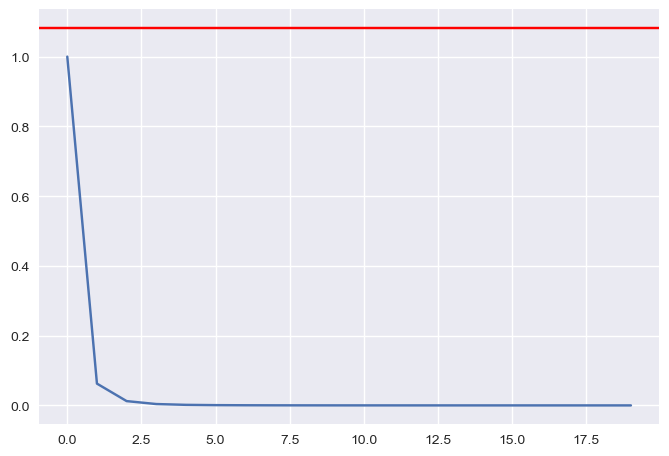

In [69]:
sum_a, out = sumSeriesA(20)

plt.plot(out)
plt.axhline(y=np.divide(np.power(np.pi, 4), 90), color="r", linestyle="-")

In [70]:
def sumSeriesD(n):
    sum = 0
    all_val = []
    for i in range(n, 0, -1):
        value = np.divide(1, np.power(i, 4))
        sum += value
        all_val.append(value)
    return sum, all_val

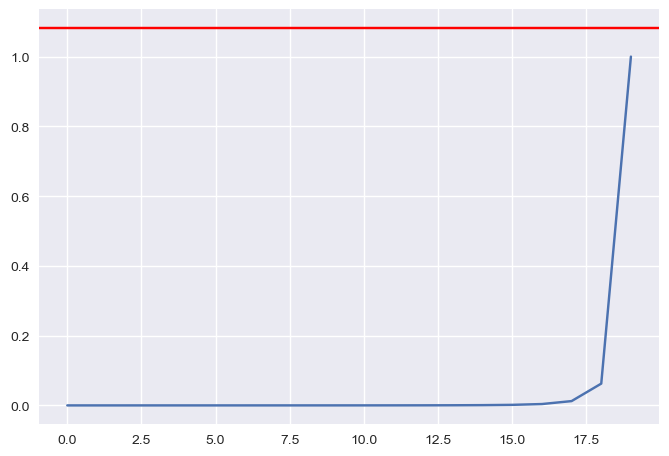

In [71]:
sum_d, out_d = sumSeriesD(20)
plt.plot(out_d)
plt.axhline(y=np.divide(np.power(np.pi, 4), 90), color="r", linestyle="-")

In [78]:
def sumSeries(n):
    out_a, a2 = sumSeriesA(n)
    out_d, d2 = sumSeriesD(n)
    comp_a = sumSeries_Def - out_a
    comp_d = sumSeries_Def - out_d
    return comp_a, comp_d

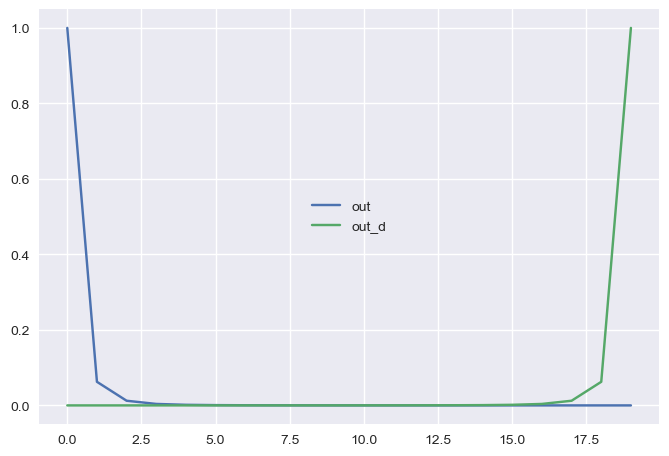

In [73]:
plt.plot(out, label = "out")
plt.plot(out_d, label = "out_d")
plt.legend(loc='center')
plt.show()

In [ ]:
# find first difference
n = 1
same = True
while same == True:
    out_a, out_d = sumSeries(n)

In [151]:
#calculate differences to sumseries_Def
n = 0
iterations = 2000
differences_a = []
differences_d = []
comp_differences = []
for i in range (10, iterations):
    n = i
    difference_a, difference_d = sumSeries(n)
    #print("n:", n, "A:", sum_a, "-", "D:", sum_d, "=", difference)
    differences_a.append(difference_a)
    differences_d.append(difference_d)
    comp_differences.append(difference_d - difference_a)
#print(differences)

Show difference to actual number depending on n

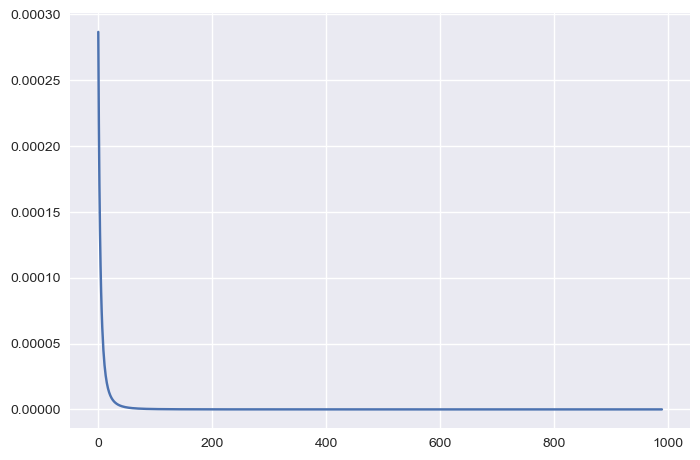

In [150]:
dif_a = plt.plot(differences_a, )
plt.show(dif_a)

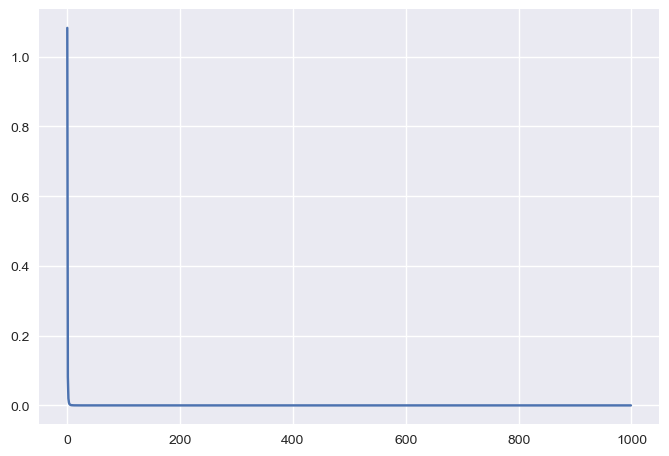

In [130]:
dif_d = plt.plot(differences_d)
plt.show(dif_d)

 Print values, for which SumSeriesA and SumSeriesD are not equal

In [138]:
counter = 0
for i in range(0,1000):
    a, d = sumSeries(i)
    #print(a - d)
    if a != d:
       print("Iteration:", i)
       counter += 1
print(counter)

Iteration: 13
Iteration: 22
Iteration: 33
Iteration: 35
Iteration: 36
Iteration: 40
Iteration: 41
Iteration: 48
Iteration: 49
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 66
Iteration: 67
Iteration: 69
Iteration: 75
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126
Iterati

Plot SumSeriesD - SumSeriesA


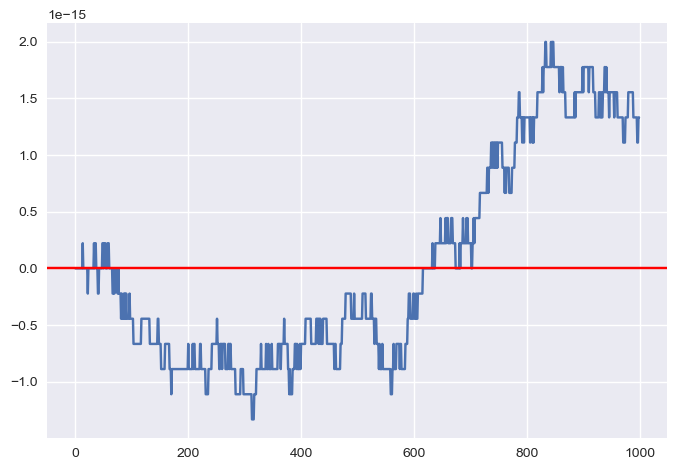

In [131]:
dif_comp = plt.plot(comp_differences)
plt.axhline(y=0, color="r", linestyle="-")

plt.show(dif_comp)

# Tarea 2

define functions

In [154]:
def quadratic1(a, b, c):
    x1 = np.divide(-b - np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
    x2 = np.divide(-b + np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
    return x1, x2 

def quadratic2(a, b, c):
    x1 = np.divide(2*c, -b + np.sqrt(np.power(b, 2) -4*a*c))
    x2 = np.divide(2*c, -b - np.sqrt(np.power(b, 2) -4*a*c))
    return x1, x2

def quadratic3(a, b, c):
    q = -1/2* (b + np.sign(b)*np.sqrt(np.power(b, 2)- 4*a*c))
    x1 = np.divide(q, a)
    x2 = np.divide(c, q)
    return x1, x2

In [165]:
def show_equivalence(a, b, c):
    out1_1, out1_2 = quadratic1(a, b, c)
    out2_1, out2_2 = quadratic2(a, b, c)
    out3_1, out3_2 = quadratic3(a, b, c)

    print('{0:.20f}'.format(out1_1))
    print(out1_1, out1_2)
    print(out2_1, out2_2)
    print(out3_1, out3_2)


In [166]:
show_equivalence(1, 5, 6)

-3.00000000000000000000
-3.0 -2.0
-3.0 -2.0
-3.0 -2.0


In [162]:
show_equivalence(3, 0 , -9)

-1.7320508075688774 1.7320508075688774
-1.7320508075688772 1.7320508075688772
-0.0 inf


/var/folders/gx/rkm0l2cx2nj7pjk5321pfqb00000gn/T/ipykernel_67346/2395113372.py:14: RuntimeWarning: divide by zero encountered in true_divide
  x2 = np.divide(c, q)


In [160]:
show_equivalence(2, 4, -5)

-2.8708286933869704 0.8708286933869707
-2.870828693386971 0.8708286933869708
-2.8708286933869704 0.8708286933869708
